In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
files.upload()

{}

In [12]:
Using TensorFlow backend.
Found GPU at: /device:GPU:0


SyntaxError: invalid syntax (<ipython-input-12-d1ea991d6607>, line 1)

In [4]:
# load the dataset
dataframe = pandas.read_csv('PJME_hourly.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.1)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

7489 67409


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
7487/7487 - 32s - loss: 0.0038 - 32s/epoch - 4ms/step
Epoch 2/100
7487/7487 - 34s - loss: 0.0016 - 34s/epoch - 5ms/step
Epoch 3/100
7487/7487 - 29s - loss: 0.0016 - 29s/epoch - 4ms/step
Epoch 4/100
7487/7487 - 28s - loss: 0.0016 - 28s/epoch - 4ms/step
Epoch 5/100
7487/7487 - 23s - loss: 0.0016 - 23s/epoch - 3ms/step
Epoch 6/100
7487/7487 - 22s - loss: 0.0016 - 22s/epoch - 3ms/step
Epoch 7/100
7487/7487 - 21s - loss: 0.0016 - 21s/epoch - 3ms/step
Epoch 8/100
7487/7487 - 20s - loss: 0.0016 - 20s/epoch - 3ms/step
Epoch 9/100
7487/7487 - 22s - loss: 0.0016 - 22s/epoch - 3ms/step
Epoch 10/100
7487/7487 - 21s - loss: 0.0016 - 21s/epoch - 3ms/step
Epoch 11/100
7487/7487 - 21s - loss: 0.0016 - 21s/epoch - 3ms/step
Epoch 12/100
7487/7487 - 21s - loss: 0.0016 - 21s/epoch - 3ms/step
Epoch 13/100
7487/7487 - 21s - loss: 0.0016 - 21s/epoch - 3ms/step
Epoch 14/100
7487/7487 - 21s - loss: 0.0016 - 21s/epoch - 3ms/step
Epoch 15/100
7487/7487 - 21s - loss: 0.0016 - 21s/epoch - 3ms/step
Epoc

KeyboardInterrupt: 

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2107/2107 [==============================] - 4s 2ms/step
Train Score: 1685.45 RMSE
Test Score: 1638.21 RMSE


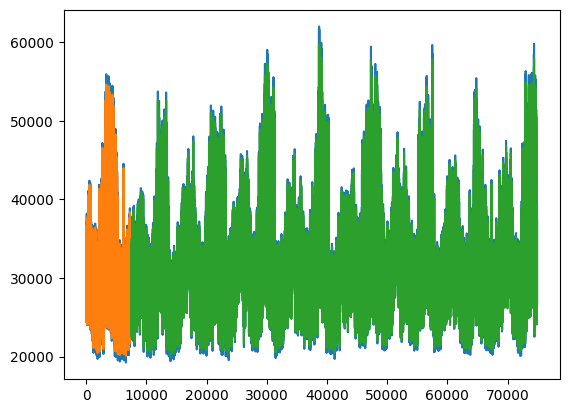

In [19]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# load the dataset
dataframe = pandas.read_csv('PJME_hourly.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.1)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# convert an array of values into a dataset matrix with rolling window
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# specify the size of the rolling window
rolling_window = 10

# reshape into X=t and Y=t+1 with the rolling window size
trainX, trainY = create_dataset(train, look_back=rolling_window)
testX, testY = create_dataset(test, look_back=rolling_window)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, rolling_window)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[rolling_window:len(trainPredict)+rolling_window, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(rolling_window*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Epoch 1/100
14525/14525 - 52s - loss: 0.0017 - 52s/epoch - 4ms/step
Epoch 2/100
14525/14525 - 50s - loss: 6.9105e-04 - 50s/epoch - 3ms/step
Epoch 3/100
14525/14525 - 52s - loss: 6.3987e-04 - 52s/epoch - 4ms/step
Epoch 4/100
14525/14525 - 45s - loss: 6.0389e-04 - 45s/epoch - 3ms/step
Epoch 5/100
14525/14525 - 42s - loss: 5.7848e-04 - 42s/epoch - 3ms/step
Epoch 6/100
14525/14525 - 43s - loss: 5.6821e-04 - 43s/epoch - 3ms/step
Epoch 7/100
14525/14525 - 43s - loss: 5.5267e-04 - 43s/epoch - 3ms/step
Epoch 8/100
14525/14525 - 47s - loss: 5.4771e-04 - 47s/epoch - 3ms/step
Epoch 9/100
14525/14525 - 45s - loss: 5.3784e-04 - 45s/epoch - 3ms/step
Epoch 10/100
14525/14525 - 51s - loss: 5.2295e-04 - 51s/epoch - 4ms/step
Epoch 11/100
